# Tarea 2
### Contando historias de speedup y análisis de Anscombe.
### Ortega Ibarra Jaime Jesus.
Con base en la tabla de datos mostrada en la diapositiva 4 de la presentación Introducción a la Visualización, realizar lo siguiente:

1. Encontrar el valor atípico y explicar por qué se considera un valor extraño.

Encontré como valor atípico el tiempo inicia, el cual tiene un valor de $29278$ Segundos.
Lo consideré de esa manera, ya que existe una gran diferencia entre ese valor con respecto a los demas, es decir se aleja en grandes cantidades a los otros resultados.
Tal como podemos observar en la gráfica de $Eficiencia Relativa$, tiene una gran lejanía con los demás valores.


2. Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.


In [16]:
Datos = {'Procesadores':[1,16,25,64,256,400],
         'Time[s]':[29278,178,78,16,2,1]}
type(Datos)

dict

In [17]:
import pandas as pd
df = pd.DataFrame(Datos)
df

,Procesadores,Time[s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


De igual Manera podemos comprobar mediante una gráfica de caja, para ello graficamos el tiempo de nuestro DataFrame mediante la biblioteca $seaborn$.

In [18]:
import seaborn as sns
Tiempo = df['Time[s]']
sns.boxplot(Tiempo)

Como podemos observar, el último dato se encuentra bastante alejado del resto.

3. Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con $p'$ $=$ $16$. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [19]:
#Caso Absoluto
p = df['Procesadores']
t = df['Time[s]']
Sp = []
Ea = []
Cp = []

#Aceleración
for i in range(len(df)):
    speed = t[0] / t[i]
    Sp.append(speed)
print('Speedup: \n', Sp)

#Eficiencia Absoluta
for i in range(len(df)):
    Effi = Sp[i]/p[i]
    Ea.append(Effi)
print('Efficiency: \n', Ea)

#Costo
for i in range(len(df)):
    Costo = p[i]*t[i]
    Cp.append(Costo)
print('Costos: \n', Cp)

Speedup: 
 [1.0, 164.48314606741573, 375.35897435897436, 1829.875, 14639.0, 29278.0]
Efficiency: 
 [1.0, 10.280196629213483, 15.014358974358975, 28.591796875, 57.18359375, 73.195]
Costos: 
 [29278, 2848, 1950, 1024, 512, 400]


In [20]:
#Caso Relativo
p1 = 16
Sp_Rel = []
Ea_Rel = []
Max_Sp_Rel = []

#Aceleracion Relativa
for i in range(len(df)):
    aceleracion_relativa = t[1]/t[i]
    Sp_Rel.append(aceleracion_relativa)
print('Aceleración Relativa: \n', Sp_Rel)

#Ecificencia Relativa
for i in range(len(df)):
    eficiencia_relativa = (p1*Sp_Rel[i])/p[i]
    Ea_Rel.append(eficiencia_relativa)
print('Eficiencia Relativa: \n', Ea_Rel)

#Máxima Aceleración Relativa
for i in range(len(df)):
    Max_aceleracion_relativa = p[i]/p1
    Max_Sp_Rel.append(Max_aceleracion_relativa)
print('Máxima Aceleración Relativa: \n', Max_Sp_Rel)

Aceleración Relativa: 
 [0.006079650249333971, 1.0, 2.282051282051282, 11.125, 89.0, 178.0]
Eficiencia Relativa: 
 [0.09727440398934353, 1.0, 1.4605128205128204, 2.78125, 5.5625, 7.12]
Máxima Aceleración Relativa: 
 [0.0625, 1.0, 1.5625, 4.0, 16.0, 25.0]


In [21]:
#Añadimos a DataFrame
df['Speedup']=Sp
df['Efficiency']=Ea
df['Cost']=Cp
df['Sp_Relativa']=Sp_Rel
df['Ef_Relativa']=Ea_Rel
df['MAR']=Max_Sp_Rel
df

,Procesadores,Time[s],Speedup,Efficiency,Cost,Sp_Relativa,Ef_Relativa,MAR
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,0.0625
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.0000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,1.5625
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,4.0000
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,16.0000
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,25.0000


In [22]:
import matplotlib.pyplot as plt
Proc = df['Procesadores']
tiempo = df['Time[s]']
Speedup = df['Speedup']
Eficiencia = df['Efficiency']
Costo = df['Cost']
Sp_R = df['Sp_Relativa']
Ef_R = df['Ef_Relativa']
Max_Sp = df['MAR']
#La eficiencia máxima es igual a 1, llenaremos una lista.
EM = []
for i in range(len(df)):
    EM.append(1)
EM

[1, 1, 1, 1, 1, 1]

Text(0.5, 1.0, 'Speedup')

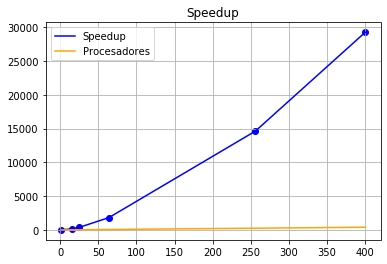

In [23]:
plt.scatter(Proc,Speedup,color='blue')
plt.plot(Proc,Speedup,color='blue')
plt.plot(Proc,Proc,color='orange')
plt.grid()
plt.legend(('Speedup','Procesadores'))
plt.title('Speedup')

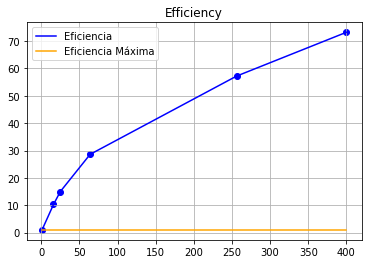

In [24]:
plt.scatter(Proc,Eficiencia,color='blue')
plt.plot(Proc,Eficiencia,color='blue')
plt.plot(Proc,EM,color='orange')
plt.grid()
plt.legend(('Eficiencia','Eficiencia Máxima'))
plt.title('Efficiency')
plt.show()

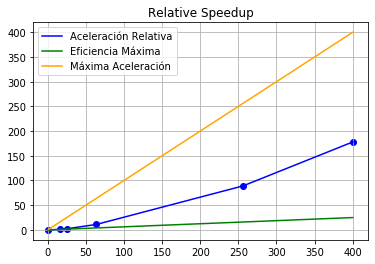

In [25]:
plt.scatter(Proc,Sp_R,color='blue')
plt.plot(Proc,Sp_R,color='blue')
plt.plot(Proc,Max_Sp,color='green')
plt.plot(Proc,Proc,color='orange')
plt.grid()
plt.legend(('Aceleración Relativa','Eficiencia Máxima','Máxima Aceleración'))
plt.title('Relative Speedup')
plt.show()

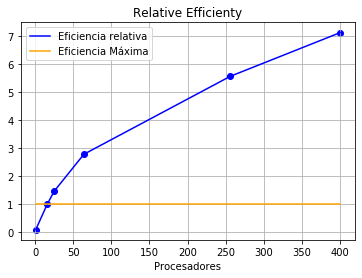

In [26]:
plt.scatter(Proc,Ef_R,color='blue')
plt.plot(Proc,Ef_R,color='blue')
plt.plot(Proc,EM,color='orange')
plt.xlabel('Procesadores')
plt.legend(('Eficiencia relativa','Eficiencia Máxima'))
plt.title('Relative Efficienty')
plt.grid()
plt.show()

4. Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [27]:
df['Time[s]'][0]=430
df.head()

/home/joiortega1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Procesadores,Time[s],Speedup,Efficiency,Cost,Sp_Relativa,Ef_Relativa,MAR
0,1,430,1.000000,1.000000,29278,0.006080,0.097274,0.0625
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.0000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,1.5625
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,4.0000
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,16.0000


In [28]:
#Caso Absoluto
p = df['Procesadores']
t = df['Time[s]']
Sp = []
Ea = []
Cp = []

#Aceleración
for i in range(len(df)):
    speed = t[0] / t[i]
    Sp.append(speed)
print('Speedup: \n', Sp)

#Eficiencia Absoluta
for i in range(len(df)):
    Effi = Sp[i]/p[i]
    Ea.append(Effi)
print('Efficiency: \n', Ea)

#Costo
for i in range(len(df)):
    Costo = p[i]*t[i]
    Cp.append(Costo)
print('Costos: \n', Cp)

Speedup: 
 [1.0, 2.4157303370786516, 5.512820512820513, 26.875, 215.0, 430.0]
Efficiency: 
 [1.0, 0.15098314606741572, 0.2205128205128205, 0.419921875, 0.83984375, 1.075]
Costos: 
 [430, 2848, 1950, 1024, 512, 400]


In [29]:
#Caso Relativo
p1 = 16
Sp_Rel = []
Ea_Rel = []
Max_Sp_Rel = []

#Aceleracion Relativa
for i in range(len(df)):
    aceleracion_relativa = t[1]/t[i]
    Sp_Rel.append(aceleracion_relativa)
print('Aceleración Relativa: \n', Sp_Rel)

#Ecificencia Relativa
for i in range(len(df)):
    eficiencia_relativa = (p1*Sp_Rel[i])/p[i]
    Ea_Rel.append(eficiencia_relativa)
print('Eficiencia Relativa: \n', Ea_Rel)

#Máxima Aceleración Relativa
for i in range(len(df)):
    Max_aceleracion_relativa = p[i]/p1
    Max_Sp_Rel.append(Max_aceleracion_relativa)
print('Máxima Aceleración Relativa: \n', Max_Sp_Rel)

Aceleración Relativa: 
 [0.413953488372093, 1.0, 2.282051282051282, 11.125, 89.0, 178.0]
Eficiencia Relativa: 
 [6.623255813953488, 1.0, 1.4605128205128204, 2.78125, 5.5625, 7.12]
Máxima Aceleración Relativa: 
 [0.0625, 1.0, 1.5625, 4.0, 16.0, 25.0]


In [30]:
df['Speedup']=Sp
df['Efficiency']=Ea
df['Cost']=Cp
df['Sp_Relativa']=Sp_Rel
df['Ef_Relativa']=Ea_Rel
df['MAR']=Max_Sp_Rel
df

,Procesadores,Time[s],Speedup,Efficiency,Cost,Sp_Relativa,Ef_Relativa,MAR
0,1,430,1.000000,1.000000,430,0.413953,6.623256,0.0625
1,16,178,2.415730,0.150983,2848,1.000000,1.000000,1.0000
2,25,78,5.512821,0.220513,1950,2.282051,1.460513,1.5625
3,64,16,26.875000,0.419922,1024,11.125000,2.781250,4.0000
4,256,2,215.000000,0.839844,512,89.000000,5.562500,16.0000
5,400,1,430.000000,1.075000,400,178.000000,7.120000,25.0000


In [31]:
Proc = df['Procesadores']
tiempo = df['Time[s]']
Speedup = df['Speedup']
Eficiencia = df['Efficiency']
Costo = df['Cost']
Sp_R = df['Sp_Relativa']
Ef_R = df['Ef_Relativa']
Max_Sp = df['MAR']
#La eficiencia máxima es igual a 1, llenaremos una lista.
EM = []
for i in range(len(df)):
    EM.append(1)
EM

[1, 1, 1, 1, 1, 1]

Text(0.5, 1.0, 'Speedup')

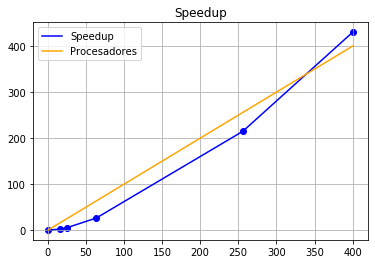

In [32]:
plt.scatter(Proc,Speedup,color='blue')
plt.plot(Proc,Speedup,color='blue')
plt.plot(Proc,Proc,color='orange')
plt.grid()
plt.legend(('Speedup','Procesadores'))
plt.title('Speedup')

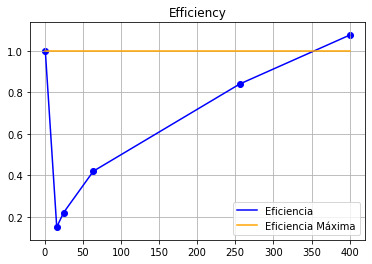

In [33]:
plt.scatter(Proc,Eficiencia,color='blue')
plt.plot(Proc,Eficiencia,color='blue')
plt.plot(Proc,EM,color='orange')
plt.grid()
plt.legend(('Eficiencia','Eficiencia Máxima'))
plt.title('Efficiency')
plt.show()

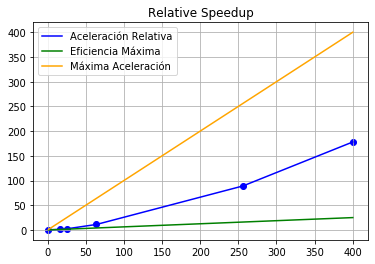

In [34]:
plt.scatter(Proc,Sp_R,color='blue')
plt.plot(Proc,Sp_R,color='blue')
plt.plot(Proc,Max_Sp,color='green')
plt.plot(Proc,Proc,color='orange')
plt.grid()
plt.legend(('Aceleración Relativa','Eficiencia Máxima','Máxima Aceleración'))
plt.title('Relative Speedup')
plt.show()

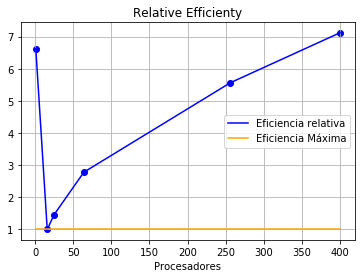

In [35]:
plt.scatter(Proc,Ef_R,color='blue')
plt.plot(Proc,Ef_R,color='blue')
plt.plot(Proc,EM,color='orange')
plt.xlabel('Procesadores')
plt.legend(('Eficiencia relativa','Eficiencia Máxima'))
plt.title('Relative Efficienty')
plt.grid()
plt.show()

5. Contar la historia del análisis de esta información usando gráficos que resalten lo realizado en los incisos 2 y 3.

Realizamos como actividad Un $DataFrame$ con un set pequeño de datos que incluyen la relación de tiempo con respecto al número de procesadores, en este caso directamente en $Python$ realicé un diccionario con los datos y posteriormente mediante la biblioteca $Pandas$ convertí dicho diccionario en un $DataFrame$.

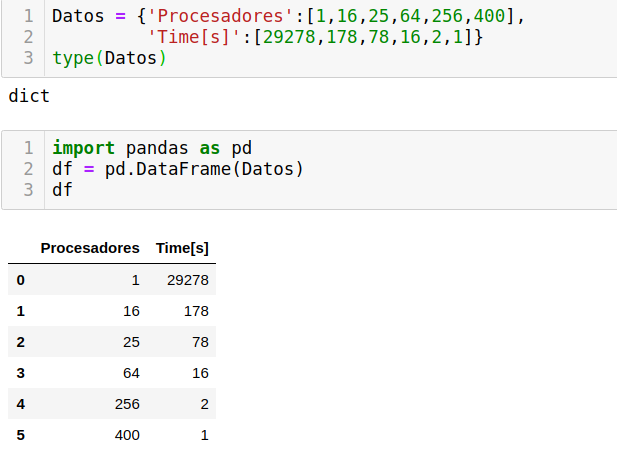

In [36]:
from IPython.display import Image
Image("Actividad2.png", width=550, height=500)

En la actividad 3, realizamos todos los cálculos necesarios para obtener Speedup, Efficiency y Costo, tanto para un análisis absoluto como para un análisis Relativo.

En las gráficas pudimos observar completamente el comportamiento de los datos y su crecimiento.

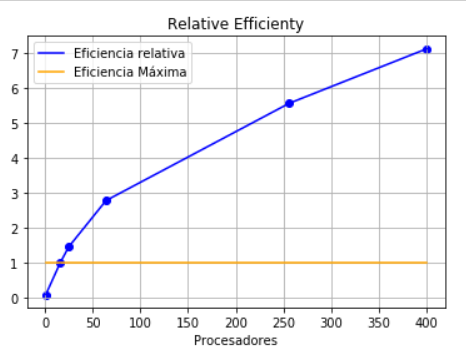

In [40]:
Image("grafica1.png", width=550, height=500)

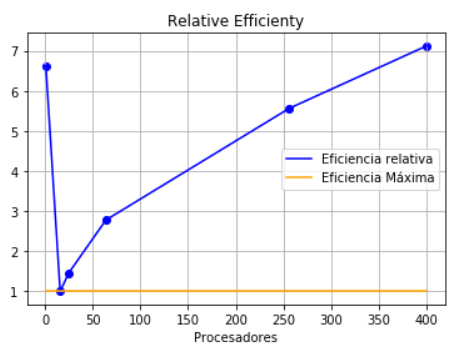

In [39]:
Image("grafica2.png", width=550, height=500)

Tal como podemos observar en las gráficas anteriores, podemos ver el comportamiento de un proceso en cuestión de tiempo, aceleración y eficiencia de acuerdo a los recursos existentes y no solo ver los datos en crudo, si no poder obtener una buena visualización que facilite el entendimiento.